In [10]:
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(100, activation='relu', input_dim=10))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(1))  # Assuming we're generating one time step at a time
    return model

In [4]:
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(50, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output probability of being real
    return model

In [5]:
def build_gan(generator, discriminator):
    discriminator.compile(optimizer='adam', loss='binary_crossentropy')
    discriminator.trainable = False

    gan_input = layers.Input(shape=(10,))
    x = generator(gan_input)
    gan_output = discriminator(x)

    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    return gan

In [6]:
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

c:\Users\elfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
import pandas as pd
import numpy as np
file_path = 'infant_2_5h_respiration_rate_outlierRem.csv'
df = pd.read_csv(file_path)
columns = ['respiration_peak_time (seconds)', 'respiration_rate']

df_data = df[columns]
df_data

,respiration_peak_time (seconds),respiration_rate
0,2.22,54.545455
1,3.28,56.603774
2,4.18,66.666667
3,5.26,55.555556
4,6.32,56.603774
...,...,...
16875,17997.34,96.774194
16876,17997.88,111.111111
16877,17998.38,120.000000
16878,17998.98,100.000000


In [8]:
def train_gan(gan, generator, discriminator, data, epochs=100, batch_size=32):
    for epoch in range(epochs):
        # Generate random noise for the generator
        noise = np.random.normal(0, 1, (batch_size, 10))
        generated_data = generator.predict(noise)
        
        # Select a random batch of real data
        real_data = data[np.random.randint(0, data.shape[0], batch_size)]
        
        # Create labels for real and fake data
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))
        
        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
        
        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 10))
        valid_y = np.ones((batch_size, 1))  # We want the discriminator to think these are real
        g_loss = gan.train_on_batch(noise, valid_y)
        
        # Print the progress
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss_real + d_loss_fake}] [G loss: {g_loss}]")

data = df_data['respiration_rate'].to_numpy().reshape(-1, 1)
data
#train_gan(gan, generator, discriminator, data)

array([[ 54.54545455],
       [ 56.60377358],
       [ 66.66666667],
       ...,
       [120.        ],
       [100.        ],
       [120.        ]])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


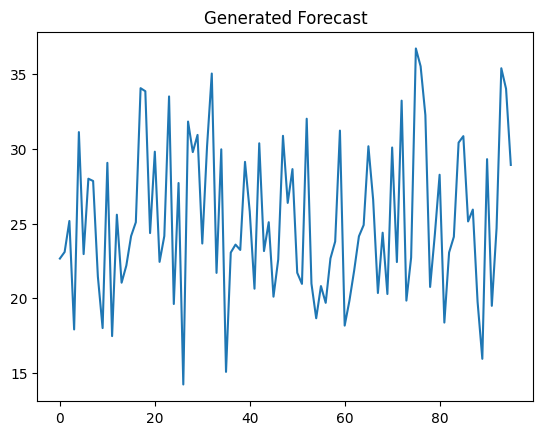

In [9]:
import matplotlib.pyplot as plt
def generate_forecast(generator, steps=96):
    noise = np.random.normal(0, 1, (steps, 10))
    generated_data = generator.predict(noise)
    return generated_data

forecast = generate_forecast(generator)
plt.plot(forecast)
plt.title('Generated Forecast')
plt.show()